<a href="https://colab.research.google.com/github/aalexakos/Depression-Detection/blob/depression_detection_EDA/Depression_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OCD Patient Dataset: Demographics & Clinical Data**

The "OCD Patient Dataset: Demographics & Clinical Data" provides a detailed profile of 1,500 individuals diagnosed with Obsessive-Compulsive Disorder (OCD), offering valuable insights into both demographic and clinical aspects. The dataset captures essential demographic details such as age, gender, ethnicity, marital status, and education level, giving a comprehensive overview of the patient population.

Clinically, the dataset includes information on the date of diagnosis, symptom duration, and any previous psychiatric diagnoses, which help contextualize each patient's medical history. It further categorizes OCD symptoms into obsessions and compulsions, with severity measured using Yale-Brown Obsessive-Compulsive Scale (Y-BOCS) scores for both types of symptoms.

In addition, the dataset highlights any co-occurring mental health conditions such as depression or anxiety and provides detailed information on the medications prescribed to patients, offering a glimpse into treatment strategies. It also records whether patients have a family history of OCD, allowing for the exploration of potential genetic or environmental influences on the disorder. This dataset is a valuable resource for research into OCD’s demographic patterns, symptomatology, and treatment approaches.


In [22]:
!pip install shap

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import shap


# EDA

##dataset

In [24]:
from google.colab import files
uploaded = files.upload()

Saving ocd_patient_dataset.csv to ocd_patient_dataset (2).csv


In [25]:

df = pd.read_csv("ocd_patient_dataset.csv")
df.head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [26]:
df.shape

(1500, 17)

####Basic EDA

In [27]:

print(df.columns)


Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')


## Analytical questions


### Which types of compulsions are most associated with depression?

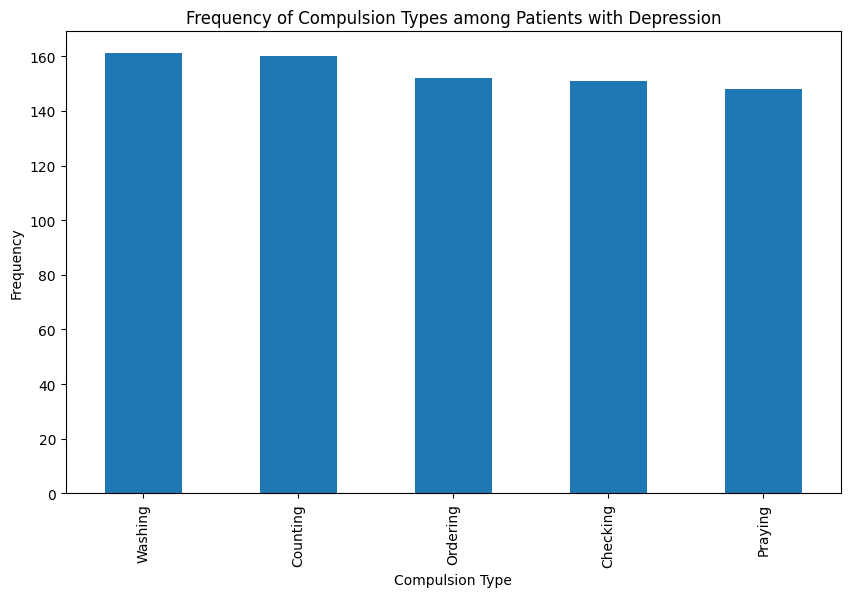

In [28]:
#code:

# Filter patients with depression
depression_patients = df[df['Depression Diagnosis'] == 'Yes']

# Count the frequency of each compulsion type
compulsion_counts = depression_patients['Compulsion Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
compulsion_counts.plot(kind='bar')
plt.title('Frequency of Compulsion Types among Patients with Depression')
plt.xlabel('Compulsion Type')
plt.ylabel('Frequency')
plt.show()



###  What medications are most prescribed to OCD patients with depression?

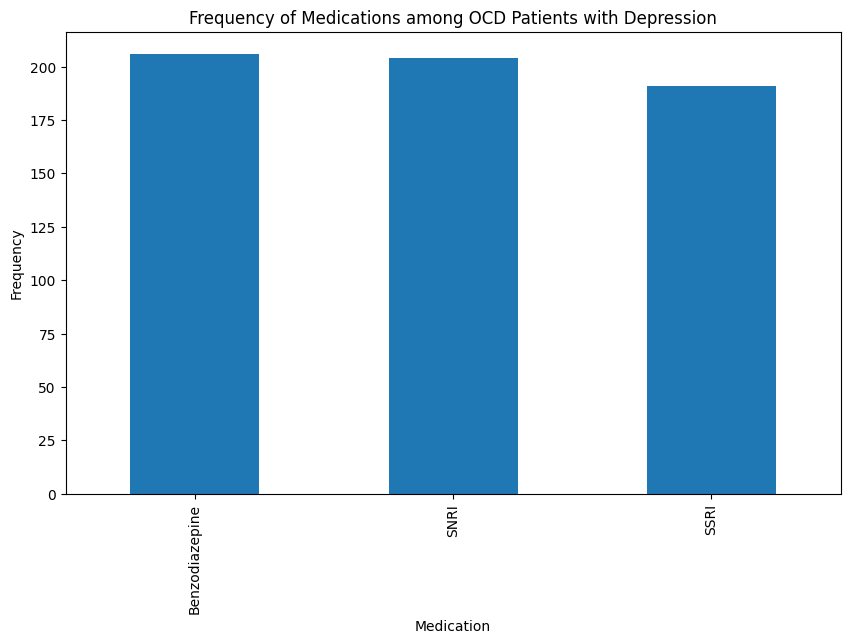

In [29]:
#code:
# Filter patients with OCD and depression
ocd_depression_patients = df[(df['OCD Diagnosis Date'].notna()) & (df['Depression Diagnosis'] == 'Yes')]

# Count the frequency of each medication
medication_counts = ocd_depression_patients['Medications'].str.split(',').explode().value_counts()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
medication_counts.plot(kind='bar', stacked=True)
plt.title('Frequency of Medications among OCD Patients with Depression')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.show()

### How many OCD patients have a family history of OCD?

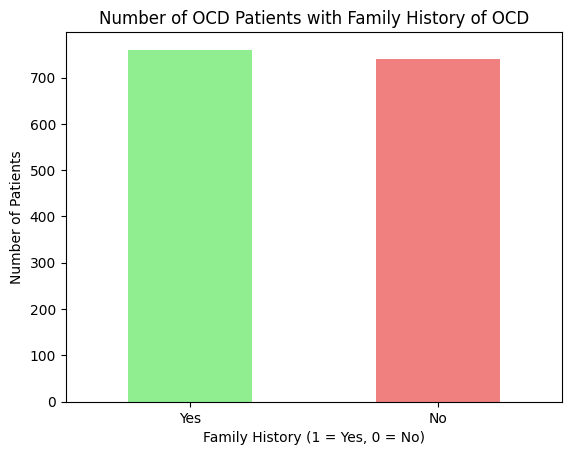

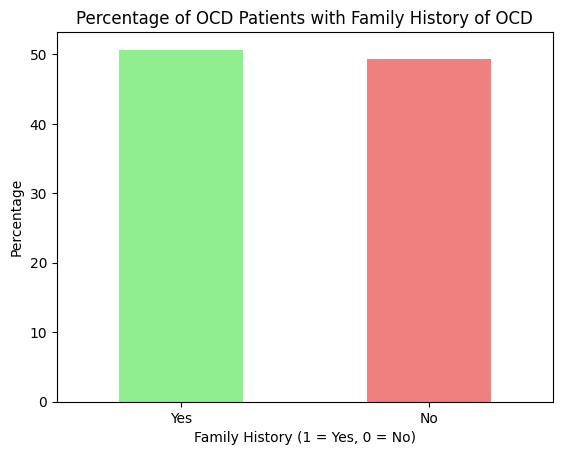

In [30]:
# Contar cuántos pacientes tienen historial familiar de OCD
family_history_counts = df['Family History of OCD'].value_counts()

# Gráfico de barras para el historial familiar de OCD
family_history_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Number of OCD Patients with Family History of OCD')
plt.xlabel('Family History (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.show()

# Para porcentaje
family_history_percent = family_history_counts / family_history_counts.sum() * 100
family_history_percent.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Percentage of OCD Patients with Family History of OCD')
plt.xlabel('Family History (1 = Yes, 0 = No)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.show()